# Improvement in classification, based on feature selection
Using the information about the top
correlating features obtained in item (4), transform the full data set **`train_smpl`** so as to keep the
following attributes:
* Using only the top 5 pixels from each **`train_smpl_\<label>`**.
* Using only the top 10 pixels from each **`train_smpl_\<label>`**.
* Using only the top 20 pixels from each **`train_smpl_\<label>`**.
* You will have three data sets, with approximately 50, 100 and 200 features (pixels) each.
Repeat the experiment described in item (3) on these three data sets.

In [1]:
import numpy as np

In [2]:
from Scripts import pixelFinder as pf 
from Scripts.NaiveBayse import NaiveBayseGaussian as nbg
from Scripts import helperfn as hf
from Scripts import plotScripts as ps
%load_ext autoreload
%autoreload 2


In [38]:
def get_top_pixels(n):
    pixel_order = []
    for i in range(-1, 10):
        pixel_order.append(np.array(pf.bestPixels(i, n)))
    return pixel_order

def grab_n_pixels(pixel_order, n):
    output = []

    # j is the pixel order list
    for j in range(len(pixel_order)):
        output.append(pixel_order[j][:n]) 

    return output


def data_lists():
    data = []
    for i in range(-1, 10):
        data.append(helperfn.get_data(i))
    return data

def build_classifiers(data, pixel_order, y_labels, balance_classes=False):
    classifiers = []
    scores = []
    dataset = []
    for i in range(0, 11):
        X = np.take(data, pixel_order[i], axis=1)
        y = y_labels[i]
        classifier, score, local_data = nbg.nbg_model_custom_data(X, y, data_label=i-1, balance_classes=balance_classes)
        classifiers += [classifier]
        scores += [score]
        dataset += [local_data]

    return classifiers, scores, dataset

In [4]:
pixel_order = get_top_pixels(2304)

In [5]:
labels = []
for i in range(-1, 10):
    labels.append(hf.get_results(i))

In [6]:
x_data = hf.get_data_noresults();

In [7]:
pixels = []

pixels = grab_n_pixels(pixel_order, 5)

In [75]:
print(len(pixels))
print((x_data.shape))

11
(9690, 2304)


In [8]:


bal_classifers, bal_scores, bal_data = build_classifiers(x_data, pixels, labels, balance_classes=True)



    




Scores for dataset:  All Classes
Training data score:  0.2226190476190476
Testing data score:  0.19285714285714287
--------------------------------------
Scores for dataset:  speed limit 20
Training data score:  0.6011904761904762
Testing data score:  0.6190476190476191
--------------------------------------
Scores for dataset:  speed limit 30
Training data score:  0.5523648648648649
Testing data score:  0.5484234234234234
--------------------------------------
Scores for dataset:  speed limit 50
Training data score:  0.5727777777777778
Testing data score:  0.5555555555555556
--------------------------------------
Scores for dataset:  speed limit 60
Training data score:  0.7743794326241135
Testing data score:  0.8209219858156028
--------------------------------------
Scores for dataset:  speed limit 70
Training data score:  0.59375
Testing data score:  0.6035353535353535
--------------------------------------
Scores for dataset:  left turn
Training data score:  0.6607142857142857
Testi

In [10]:
print(bal_scores[0])



[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]


In [72]:
bal_scores_list = []


for i in range(5,500):
    pixels = grab_n_pixels(pixel_order, i)

    bal_classifers, bal_scores, bal_data = build_classifiers(x_data, pixels, labels, balance_classes=True)
    print(bal_scores)
    bal_scores_list.append(bal_scores)



265070921985816, 0.7695035460992907), (0.6089015151515151, 0.6224747474747475), (0.6428571428571429, 0.6547619047619048), (0.7517361111111112, 0.7430555555555556), (0.6848958333333334, 0.8020833333333334), (0.5706018518518519, 0.5601851851851852), (0.7453703703703703, 0.7314814814814815)]
Scores for dataset:  All Classes
Training data score:  0.3613095238095238
Testing data score:  0.32857142857142857
--------------------------------------
Scores for dataset:  speed limit 20
Training data score:  0.7261904761904762
Testing data score:  0.7023809523809523
--------------------------------------
Scores for dataset:  speed limit 30
Training data score:  0.6033220720720721
Testing data score:  0.634009009009009
--------------------------------------
Scores for dataset:  speed limit 50
Training data score:  0.5458333333333333
Testing data score:  0.5322222222222223
--------------------------------------
Scores for dataset:  speed limit 60
Training data score:  0.7265070921985816
Testing data

In [75]:
print(bal_scores_list[0])
train_scores , test_scores = ps.unzip_scores(bal_scores_list[0])



#ps.unzip_scores(bal_scores_list[0][0])

[(0.2226190476190476, 0.19285714285714287), (0.6011904761904762, 0.6190476190476191), (0.5523648648648649, 0.5484234234234234), (0.5727777777777778, 0.5555555555555556), (0.7743794326241135, 0.8209219858156028), (0.59375, 0.6035353535353535), (0.6607142857142857, 0.7261904761904762), (0.8020833333333334, 0.8055555555555556), (0.703125, 0.6979166666666666), (0.6180555555555556, 0.5925925925925926), (0.7129629629629629, 0.6759259259259259)]


In [76]:
train_scores

array([0.22261905, 0.60119048, 0.55236486, 0.57277778, 0.77437943,
       0.59375   , 0.66071429, 0.80208333, 0.703125  , 0.61805556,
       0.71296296])

In [77]:
test_scores

array([0.19285714, 0.61904762, 0.54842342, 0.55555556, 0.82092199,
       0.60353535, 0.72619048, 0.80555556, 0.69791667, 0.59259259,
       0.67592593])

In [78]:
#ps.unzip_scores(unbal_scores) == bal_scores_list[0][0]
#

train_scores = []
test_scores = []

# loops over pixels
for i in range(len(bal_scores_list)):
    train, test = ps.convert_percentage(ps.unzip_scores(bal_scores_list[i]))
    train_scores.append(train.astype(int))
    test_scores.append(test.astype(int))








In [79]:
np_train_scores = np.array(train_scores)

np_train_scores[:,0]

array([22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26, 25, 25, 25, 25, 25,
       25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28,
       28, 28, 29, 29, 28, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 29, 30,
       30, 30, 31, 31, 31, 31, 31, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 32, 32, 33, 33, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34,
       34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 35, 36, 36, 36, 36,
       36, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 34,
       34, 34, 34, 34, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
       34, 34, 34, 34, 34

In [ ]:
# The X axis will be the number of pixels in the classifier 
# The Y axis will be the accuarcy of the classifier 
# The colour of the line denotes individual classes 



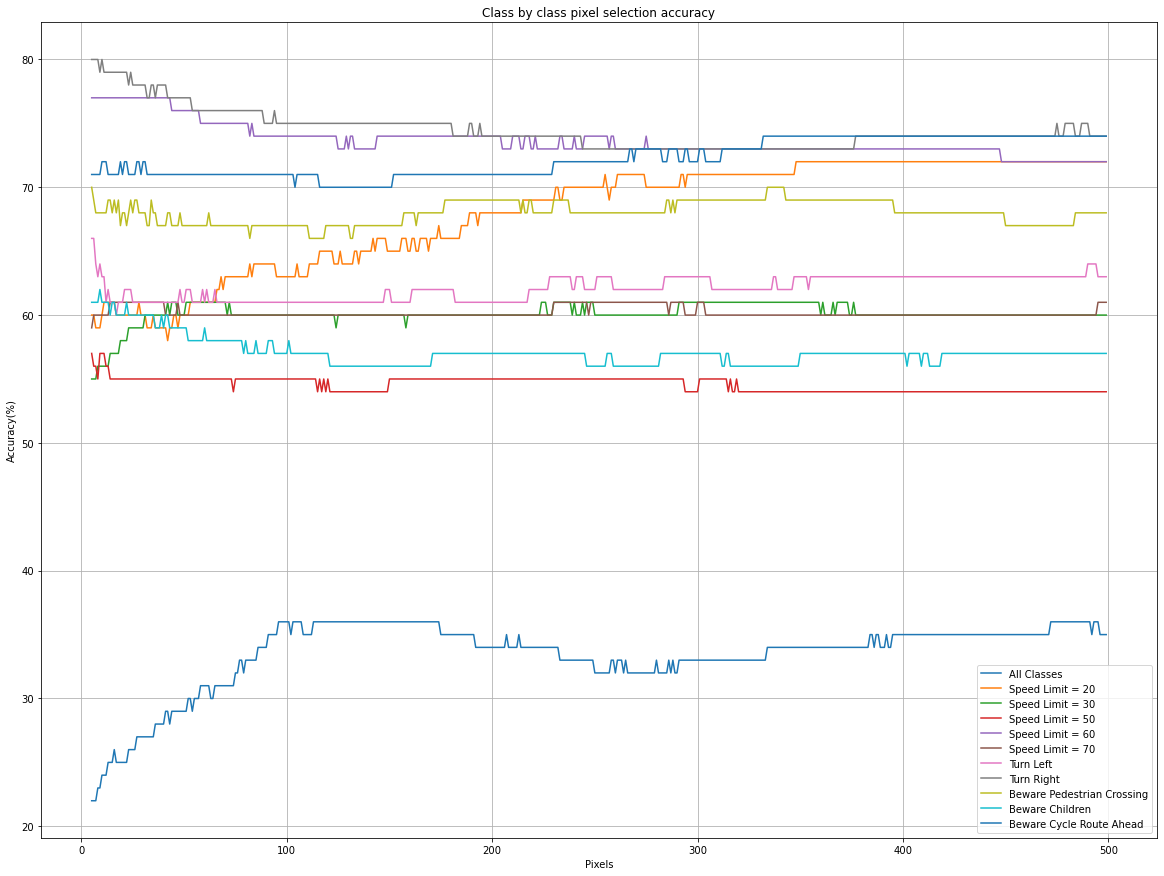

In [97]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# Data for plotting
# T x axis
t = [i for i in range(5,500)]
# S y axis
s = np_train_scores[:,0]
a = np_train_scores[:,1]
b = np_train_scores[:,2]
c = np_train_scores[:,3]
d = np_train_scores[:,4]
e = np_train_scores[:,5]
f = np_train_scores[:,6]
g = np_train_scores[:,7]
h = np_train_scores[:,8]
i = np_train_scores[:,9]
j = np_train_scores[:,10]




fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(t, s, label='All Classes')
ax.plot(t, a, label='Speed Limit = 20')
ax.plot(t, b, label='Speed Limit = 30')
ax.plot(t, c, label='Speed Limit = 50')
ax.plot(t, d, label='Speed Limit = 60')
ax.plot(t, e, label='Speed Limit = 70')
ax.plot(t, f, label='Turn Left')
ax.plot(t, g, label='Turn Right')
ax.plot(t, h, label='Beware Pedestrian Crossing')
ax.plot(t, i, label='Beware Children')
ax.plot(t, j, label='Beware Cycle Route Ahead')
ax.legend()


ax.set(xlabel='Pixels', ylabel='Accuracy(%)',
       title='Class by class pixel selection accuracy')
ax.grid()


fig.savefig("test.png")
plt.show()